# Aprendizaje automático y aplicaciones

## Guía de trabajos prácticos del Encuentro 1

---
$A^3$ @ FI-UNER : 2021

## Sobre los ejercicios

A continuación le proponemos tres ejercicios que corresponden a la clase del día.

**Debe entregar al menos uno de ellos resuelto con un informe**. Puede agregar celdas en esta misma notebook para realizar el mismo. Agregue comentarios en el código entregado para facilitar la lectura y entendimiento.

Recuerde que **la evaluación se hará en base a las guías resueltas de cada clase** y que cada una de ellas debe resolverse **de forma individual**.

**Importante**:
- Puede utilizar librerías adicionales para resolver tareas auxiliares, por ejemplo, para la lectura de archivos de datos o configuración. 
- Para resolver el desafío planteado en el ejercicio debe utilizar sólo las librerías presentadas en clase.
- Las implementaciones deben evitar el uso de bucles innecesarios cuando éstos puedan realizarse mediante operaciones vectorizadas. Por ejemplo, recorrer patrón a patrón será considerado una mala práctica. En cambio, las iteraciones propias de un algoritmos pueden ser implementadas con bucles.

## Ejercicio 1 (*k*-means)

*k*-means es un algoritmo de agrupamiento (*clustering*) no supervisado que agrupa patrones en $k$ grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada patrón y el centroide de su grupo o *cluster*. Se suele usar la distancia euclídea. El algoritmo consta de tres pasos:

1. **Inicialización**: una vez escogido el número de grupos, *k*, se establecen *k* centroides $\boldsymbol\mu_{i}$ en el espacio de los datos, por ejemplo, escogiéndolos aleatoriamente.
2. **Asignación de patrones a los centroides**: cada patrón $\mathbf{x}_{j}$ de los datos es asignado al grupo de centroide $\boldsymbol\mu_{i}$ más cercano.
3. **Actualización de centroides**: se actualiza la posición del centroide $\boldsymbol\mu_{i}$ de cada grupo $S_i$ tomando como nuevo centroide la posición del promedio de los patrones pertenecientes a dicho grupo $\mathbf{x}_{j} \in S_i$.

Se repiten los pasos 2 y 3 hasta que los centroides no cambian entre iteraciones, o cambian por debajo de una distancia umbral en cada paso.

El algoritmo *k*-means resuelve un problema de optimización, siendo la función a optimizar (minimizar) la suma de las distancias cuadráticas de cada patrón al centroide de su cluster. 
Los patrones ($\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n$) se representan con vectores reales de *d* dimensiones ($\mathbf{x}_j \in \mathcal{R}^d$) y el algoritmo *k*-means construye *k* grupos $\mathbf{S}=\{S_1, S_2, \dots, S_k\}$ donde se minimiza la suma de distancias de los patrones $\mathbf{x}_{j} \in S_i$ a su centroide $\boldsymbol\mu_{i}$. Por lo tanto, la función de costo que se busca minimizar es:

$$\sum_{i=1}^{k} \sum_{\mathbf x_j \in S_i} \left\| \mathbf x_j - 
\boldsymbol\mu_i \right\|^2$$

La actualización de los centroides para la iteración $t+1$ se realiza en base a los agrupamientos dados en $t$:

$$\boldsymbol{\mu}_{i}^{t+1} = \frac{1}{\vert S_{i}^{t} \vert} \displaystyle\sum_{\mathbf{x}_{j} \in S_{i}^{t}} \mathbf{x}_{j}$$
    
Puede acceder al siguiente [link](https://es.wikipedia.org/wiki/K-medias) para más información del algoritmo.

#### Ejemplo: 

Grupos encontrados para `k=3` en el conjunto de datos cúmulos empleando $k=3$.

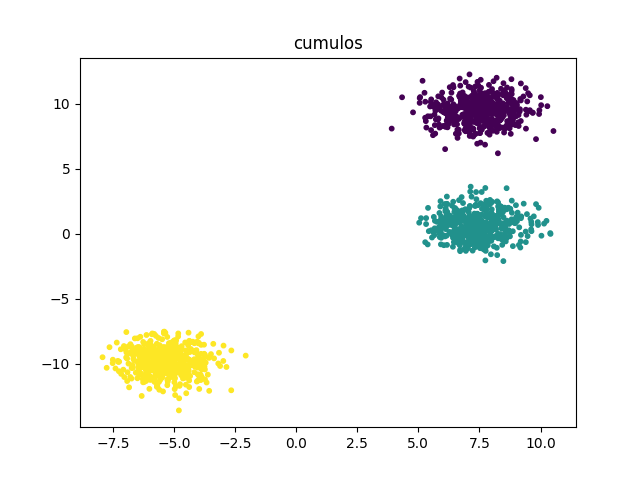

### Consigna

1. Construya una función que implemente este algoritmo y pruébelo con los datasets dados en `data2cluster.zip`. La función debe recibir:
   - `k`: Número de agrupamientos que el algoritmo debe construir.
   - `x`: Matriz de tamaño `num_patrones` por `num_caracteristicas` conteniendo los datos.
   - Párametros opcionales: para modificar las iteraciones máximas y el umbral para frenar las iteraciones por poco cambio de los centroides.
   
   La función debe devolver los agrupamientos generados (un vector de `num_patrones` indicando el grupo asignado a cada patrón) y los centroides de cada grupo. Además, la solución debe estar vectorizada evitando bucles innecesarios.
   

2. Adicionalmente, se pide que grafique la solución del agrupamiento para cada conjunto de datos. 

3. Analice y discuta el resultado obtenido en cada conjunto de datos. ¿Cómo funcionó su implementación? ¿Es suficientemente veloz para distintos valores de k?

## Ejercicio 2 (*k*-medoids)

*k*-medoids es un algoritmo de agrupamiento (*clustering*) no supervisado que agrupa patrones en $k$ grupos. El algoritmo es muy similar a `k-means` y se diferencia en que los "centroides" de cada grupo no son un promedio de sus integrantes sino un patrón representativo dentro del grupo. El agrupamiento se realiza minimizando la suma de distancias entre cada patrón y el medoide de su grupo o *cluster*. En este algoritmo la medida de similaridad no necesita ser la euclídea. Hay más de una implementación posible, por simplicidad se sugiere seguir un método similar al `k-means`:

1. **Inicialización**: una vez escogido el número de grupos, *k*, se establecen *k* medoides $\boldsymbol{m}_{i}$, por ejemplo, escogiéndolos aleatoriamente $\mathbf{x}_{j}$ o tomando los $\mathbf{x}_{j}$ más distantes entre sí.
2. **Asignación de patrones a los medoides**: cada patrón $\mathbf{x}_{j}$ de los datos es asignado al grupo cuyo medoide es más cercano $\boldsymbol{m}_{i}$.
3. **Actualización de medoides**: se actualiza el medoide $\boldsymbol{m}_{i}$ de cada grupo $S_i$ tomando como nuevo medoide el patrón $\mathbf{x}_{j} \in S_i$ que minimiza su distancia a los demás patrones del grupo.

Se repiten los pasos 2 y 3 hasta que los medoides no cambian entre iteraciones, o cambian por debajo de una distancia umbral en cada paso.
    
Puede acceder al siguiente [link](https://en.wikipedia.org/wiki/K-medoids) para más información del algoritmo.

### Consigna

1. Construya una función que implemente este algoritmo y pruébelo con los datasets dados en `data2cluster.zip`. La función debe recibir:
   - `k`: Número de agrupamientos que el algoritmo debe construir.
   - `x`: Matriz de tamaño `num_patrones` por `num_caracteristicas` conteniendo los datos.
   - Párametros opcionales: para modificar las iteraciones máximas y el umbral para frenar las iteraciones por poco cambio de los medoides.
   
   La función debe devolver los agrupamientos generados (un vector de `num_patrones` indicando el grupo asignado a cada patrón) y los medoides de cada grupo. Además, la solución debe estar vectorizada evitando bucles innecesarios.
   

2. Adicionalmente, se pide que grafique la solución del agrupamiento para cada conjunto de datos. 

3. Analice y discuta el resultado obtenido en cada conjunto de datos. ¿Cómo funcionó su implementación? ¿Es suficientemente veloz para distintos valores de k?

## Ejercicio 3 (detección de latidos)

Dada una señal unidimensional $x[n]$ correspondiente a un canal del electrocardiograma (ECG) la búsqueda de los latidos suele ser una etapa importante para el análisis de la señal. Un algoritmo simple para la detección de la ubicación de los latidos consiste en la búsqueda de los picos R del QRS mediante una ventana deslizante. Para ello se puede realizar lo siguiente en cada señal ventaneada $x_i[n]$ (con $i$ siendo el indice de la ventana):
1. Restar la media a la señal $x_i[n]$
2. Aplicar un clipado en amplitud, para eliminar las variaciones menores dentro de la ventana 
   ($x[n]=0, \; \forall{n} \text{ tal que } |x[n]| < umbral$).
3. Buscar el máximo en la señal clipada de $x_i[n]$.
4. Si existe un máximo, guardar la posición como un QRS. Caso contrario, la ventana no contiene QRS.

En la siguiente gráfica se da un ejemplo del resultado obtenido para apenas unos segundos de la señal 100 del conjunto de datos [MIT-BIH Arrythmia Database](https://physionet.org/content/mitdb/1.0.0/).
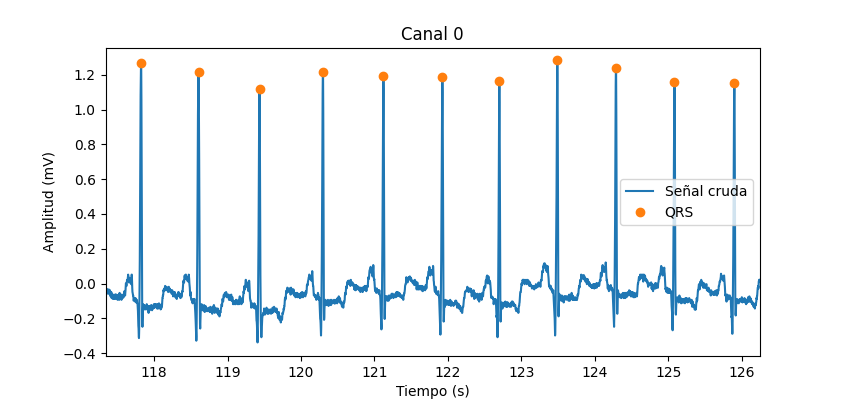

### Consigna

1. Construya una función que implemente este algoritmo y pruébelo con la señal 100 del conjunto de datos MIT-BIH Arrythmia Database (mitdb). La función debe recibir:

   - `x`: Señal unidimensional de tamaño `sig_len`.
   - `fs`: frecuencia de muestreo de la señal.
   - Párametros opcionales: tamaño de ventana y umbral de *cliping*.
   
   La función debe devolver un arreglo unidimensional con la posición (en muestras) de los picos encontrados. 
   Además, la solución debe estar vectorizada evitando bucles innecesarios.


2. Adicionalmente, se pide que grafique la solución de la detección para distintos tamaños de ventana y umbral de clipado. Analice y discuta el resultado obtenido en cada caso.


3. Si ha implementado el algoritmo *k-medoids* puede agrupar los latidos y graficarlos solapados como se muestra en la figura siguiente. Para utilizar *k-medoids* con los latidos debe recortar con un tamaño de ventana fijo alrededor de cada QRS detectado (elija el mejor detector del punto 2). De esta manera el tamaño de ventana será la dimensión de los patrones a agrupar.

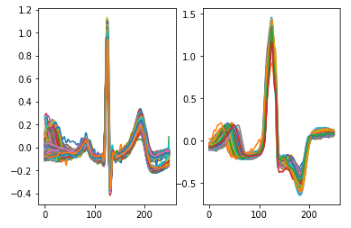

Nota: Debajo se provee el código utilizando `wfdb` para descargar y leer la señal (`ecg`) y sus atributos (`fields`). Para usar la librería deberá instalarla previamente con el código comentado o el equivalente a su sistema.

In [1]:
# ! pip install wfdb

In [2]:
import wfdb
import os 

wfdb.dl_files('mitdb', "mitdata", ["100.hea", "100.dat"])                # Descarga la señal 100
ecg, fields = wfdb.rdsamp(os.path.join("mitdata", "100"), channels=[0])  # Lectura de la señal
fields

Finished downloading files


{'fs': 360,
 'sig_len': 650000,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['MLII'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}